In [5]:
import numpy as np
import spotlight
from spotlight.datasets.movielens import get_movielens_dataset
from spotlight.cross_validation import random_train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from spotlight.datasets.synthetic import generate_sequential


## Importing the data

In [3]:
dataset = get_movielens_dataset(variant='100K')
print('dataset: ', dataset)

dataset:  <Interactions dataset (944 users x 1683 items x 100000 interactions)>


In [4]:
type(dataset)

spotlight.interactions.Interactions

In [7]:
d2 = generate_sequential()

In [10]:
 df2 = pd.DataFrame(d2.tocoo().toarray())
df2.to_csv('testdata.csv')

#### Converting the data from spotlight.interactions to a pandas dataframe

In [19]:
df = pd.DataFrame(dataset.tocoo().toarray())

In [45]:
df = df.replace(0.0, np.nan)

#### Generating mean and count rating data from the dataframe

In [72]:
mean_ratings = df.mean(skipna = True)

In [74]:
count_ratings = df.count()

In [82]:
mr = pd.concat([mean_ratings, count_ratings], axis =1)

In [83]:
mr.columns = ['mean', 'count']

In [99]:
rc = pd.DataFrame(pd.Series(dataset.ratings).value_counts())
rc.columns = ['Rating Counts']

## Visualizing the Data

### Plotting the distribtuion of all user ratings

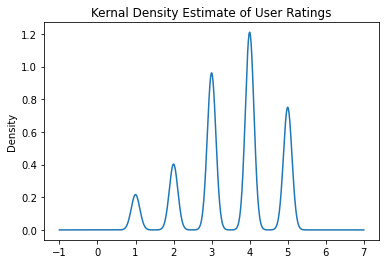

In [89]:
s = pd.Series(dataset.ratings)
ax = s.plot.kde(title = 'Kernal Density Estimate of User Ratings')

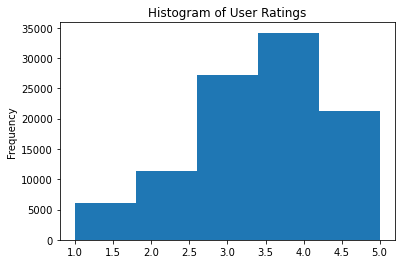

In [90]:
ax = s.plot.hist(bins = 5, title = 'Histogram of User Ratings')

### Plotting the distribution of average movie ratings

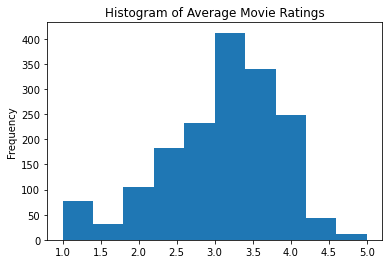

In [87]:
mean_ratings.plot.hist(title = 'Histogram of Average Movie Ratings')

### Plotting the distribution of movie rating counts

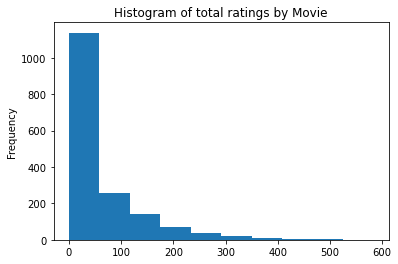

In [75]:
count_ratings.plot.hist(title = 'Histogram of total ratings by Movie')

In [79]:
count_ratings

0         0
1       452
2       131
3        90
4       209
       ... 
1678      1
1679      1
1680      1
1681      1
1682      1
Length: 1683, dtype: int64

### Plotting the average movie ratings against their total counts

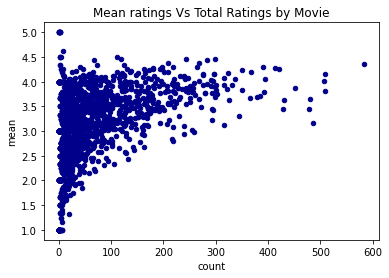

In [88]:
mr.plot.scatter(x='count',y='mean', c='DarkBlue', title = 'Mean ratings Vs Total Ratings by Movie')